# 1. Vorlesung Nichtlineare Regelungstechnik 1

## Beispiel zum Thema Grenzzyklen (anfangswertunabhängige Dauerschwingungen)

Das folgende System wird für verschiedene Anfangswerte simuliert, um zu zeigen, dass alle Trajektorien in einen Grenzzyklus einlaufen:

\begin{equation*}
\ddot x(t) - 2 \frac{c}{m}(1 - x^2(t))\dot x(t) + \frac{k}{m} x(t) = 0
\end{equation*}

mit $c, k, m > 0$. Es handelt sich um die van-der-Pol-Gleichung.

**In den Zellen 2 und 3 können Sie Einstellungen vornehmen, die die Simulation beeinflussen (sofern dieses Notebook lokal oder auf mybinder läuft).**

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2019-2022 Max Pritzkoleit und Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

# Vorbereitung der Simulation

## Import der nötigen Module

In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import matplotlib.animation as mpla
import os
from dataclasses import dataclass

## Festlegung, ob Ergebnis animiert dargestellt werden soll

Setzen Sie `DoAnmim` auf `True`, damit am Ende der Simulation eine Animation gestartet wird. Dies setzt voraus, dass die Bibliothek ffmpeg installiert ist. Sie müssen diese ggf. installieren und den Pfad in der nachfolgenden Zelle bekannt machen:

- Windows: Download von https://ffmpeg.org/download.html

In [2]:
DoAnimation = False

# Unter Windows den Pfad bitte korrekt einstellen
if os.name == 'nt':
    plt.rcParams['animation.ffmpeg_path'] = 'C:\\Progs\\ffmpeg\\bin\\ffmpeg.exe'

## Festlegung der Simulationsparameter

In [3]:
@dataclass
class sim_para:
    t0 = 0          # start time
    tf = 50         # final time
    dt = 0.04       # step-size

## Definition der rechten Seite der Differenzialgleichung

Definition der rechten Seit der Dgl. Dazu wird die Dgl. zweiter Ordnung in zwei Dgls. 
erster Ordnung mittels der Transformation $x_1 := x$, $x_2 := \dot x$ überführt.

In [4]:
def ode(t, x):
    m = 1
    c = 0.1
    K = 0.4

    x1, x2 = x          # state vector

    # dxdt = f(x):
    dxdt = np.array([x2,
                     -K/m*x1-2*c/m*(x1**2-1)*x2])

    return dxdt

## Definition der Animierungsfunktion

In dieser Funktion wird definiert, wie die Animation durchgeführt wird. Dazu wird ein `FuncAnimation`-Objekt der [matplotlib-Bibliothek](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) verwendet.

In [5]:
def sys_animation(sols, t):
    """ Funktion zur Animation des Ergebnisses """

    %matplotlib widget
    fig2, ax = plt.subplots()
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_aspect('equal')
    ax.set_xlabel(r'$y_1$')
    ax.set_ylabel(r'$y_2$')
    colors = ["r", "b", "g", "y"]

    # Axis handles
    lines = []
    for i, xi in enumerate(sols):
        lines.append(xi)
        lines[i], = ax.plot([], [], colors[i])

    def init():
        """ Init-Funktion für Matplotlib Animation """
        for line in lines:
            line.set_data([],[])
        return lines

    def animate(i):
        """ Eigentliche Zeichenfunktion für Matplotlib Animation """
        k = i % len(t)
        for j, line in enumerate(lines):
            line.set_xdata(sols[j][0, 0:k])
            line.set_ydata(sols[j][1, 0:k])
        return lines

    # Animator
    anim = mpla.FuncAnimation(fig2, animate, init_func=init, frames=len(t) + 1,
                              interval=5, repeat=True, blit=True)

    plt.grid()
    plt.show()

    return anim

## Definition des Zeitvektors und der Anfangsbedingungen

Die Simulation erfolgt mit variabler Schrittweite, es werden jedoch an den in `tt` definierten Zeitpunkten Lösungsergebnisse angefordert, um einen schönen und glatten Verlauf der Kurven zu erhalten.

Insgesamt werden vier Simulationen, startend bei `x0A` bis `x0D`, durchgeführt.

In [6]:
tt = np.arange(sim_para.t0, sim_para.tf + sim_para.dt, sim_para.dt)

# Anfangszustand
x0A = [0, .3]
x0B = [1, 0]
x0C = [1.5, 1.5]
x0D = [-.5, .5]
x0_vec = [x0A, x0B, x0C, x0D]

## Durchführung der vier Simulationen

In [7]:
# Simulation
outputs = []

for x0 in x0_vec:
    sol = sci.solve_ivp(ode, [sim_para.t0, sim_para.tf], x0, max_step=sim_para.dt)
    outputs.append(sol.y)

# Darstellung der Ergebnisse

Animation bzw. statisch

<div class="alert alert-block alert-info">
    <b>Tip:</b> Entfernen Sie das Kommentarzeichen `#` vor `%matplotlib widget`, um interaktive Plots zu erhalten (ggf. Menüpunkt Kernel - Restart Kernel and Run All Cells erforderlich).
</div>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
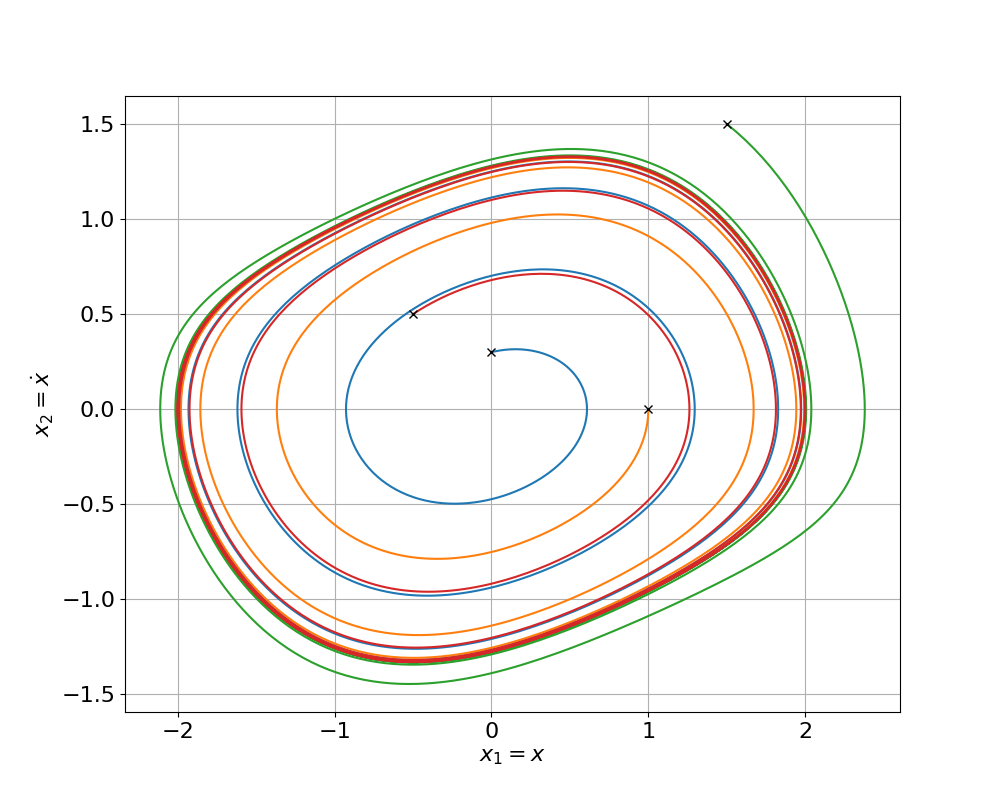

In [8]:
if DoAnimation:
    anim = sys_animation(outputs, tt)
else:
    %matplotlib widget
    plt.rcParams['font.size'] = '16'
    plt.figure(figsize=(10, 8))
    for out in outputs:
        plt.plot(out[0, :], out[1, :])
        plt.plot(out[0, 0], out[1, 0], color='k', marker='x')  # Anfangswert
    plt.xlabel('$x_1 = x$')
    plt.ylabel('$x_2 = \dot x$')
    plt.grid()